Импортируем датасет.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'iris' dataset.
Path to dataset files: /kaggle/input/iris


In [ ]:
import pandas as pd
df = pd.read_csv('/kaggle/input/iris/Iris.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Вопрос 1.1 Сколько всего записей (строк) в этой таблице?

In [ ]:
num_rows = len(df)
print("Всего записей (строк):", num_rows)

Всего записей (строк): 150


Вопрос 1.2 Данные каких типов представлены в этой таблице?

In [ ]:
print("\nТипы данных по столбцам:")
print(df.dtypes)


Типы данных по столбцам:
Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


Вопрос 1.3 Проверьте, есть ли в таблице пустые значения (nan)? Если да, удалите строки с пустыми значениями.

In [ ]:
print("\nПроверка на пропуски:")
print(df.isnull().sum())
df = df.dropna()


Проверка на пропуски:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


Вопрос 2. Какие конкретно сорта ирисов представлены в таблице?

In [ ]:
print("Сорта:", df["Species"].unique())

Сорта: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Напишите команду, которая выведет на экран количество сортов ирисов в формате:

Количество представленных в таблице сортов: N.

In [ ]:
num_species = df["Species"].nunique()
print(f"Количество представленных в таблице сортов: {num_species}.")

Количество представленных в таблице сортов: 3.


Species представляет собой так называемую "категориальную переменную".

Вопрос 3. Сколько в таблице записей, в которых параметр PetalLengthCm ниже среднего значения?

In [ ]:
mean_petal_length = df["PetalLengthCm"].mean()

below_mean_count = (df["PetalLengthCm"] < mean_petal_length).sum()

print(f"Среднее значение PetalLengthCm: {mean_petal_length:.2f}")
print(f"Количество записей, в которых PetalLengthCm ниже среднего: {below_mean_count}.")

Среднее значение PetalLengthCm: 3.76
Количество записей, в которых PetalLengthCm ниже среднего: 57.


Вопрос 4. Выведите описательную статистику по сорту "Iris-setosa".

In [ ]:
setosa_df = df[df["Species"] == "Iris-setosa"]

print(setosa_df.describe())

             Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  50.00000       50.00000     50.000000      50.000000      50.00000
mean   25.50000        5.00600      3.418000       1.464000       0.24400
std    14.57738        0.35249      0.381024       0.173511       0.10721
min     1.00000        4.30000      2.300000       1.000000       0.10000
25%    13.25000        4.80000      3.125000       1.400000       0.20000
50%    25.50000        5.00000      3.400000       1.500000       0.20000
75%    37.75000        5.20000      3.675000       1.575000       0.30000
max    50.00000        5.80000      4.400000       1.900000       0.60000


Посмотрим на то, как сильно могут отличаться распределения в зависимости от категории. Нарисуем на одном графике три "ящика с усами", каждый из которых будет соответствовать одному сорту ирисов. В качестве параметра для сравнения возьмем длину лепестков.

,0
PetalLengthCm,"Axes(0.125,0.11;0.775x0.77)"


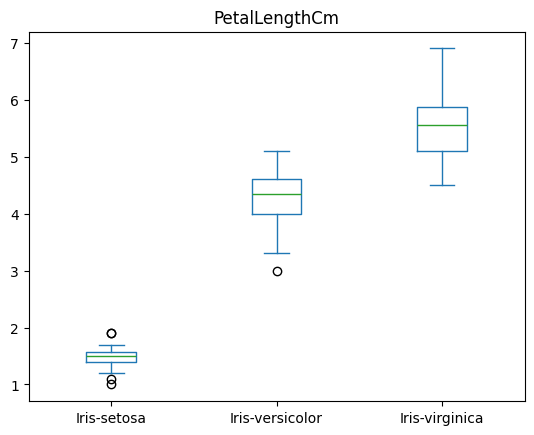

In [ ]:
df.plot.box(column='PetalLengthCm', by='Species')

Вопрос 5. Найдите среднее значение, максимум и минимум длины лепестков для КАЖДОГО СОРТА.

Потом оберните полученные данные в словарь и сформируйте новую таблицу, где столбцами будут "species", "max", "min", "average", а каждая строка будет соответствовать одному сорту ириса.

In [ ]:
stats = df.groupby("Species")["PetalLengthCm"].agg(["min", "max", "mean"]).reset_index()

stats.columns = ["species", "min", "max", "average"]

print(stats)


           species  min  max  average
0      Iris-setosa  1.0  1.9    1.464
1  Iris-versicolor  3.0  5.1    4.260
2   Iris-virginica  4.5  6.9    5.552


Вопрос 6. У одного ученого появилась гипотеза: если подсчитать для цветка значение (SepalLengthCm * SepalWidthCm) /	(PetalLengthCm *	PetalWidthCm), то можно однозначно определить, к какому сорту относится цветок. Прав ли ученый?

Чтобы понять это, добавим в таблицу новую колонку Hypothesis, рассчитаем её значение для всех строк и выведем на экран боксплот для этой колонки с разбиением по сортам (как мы делали с PetalLengthCm).

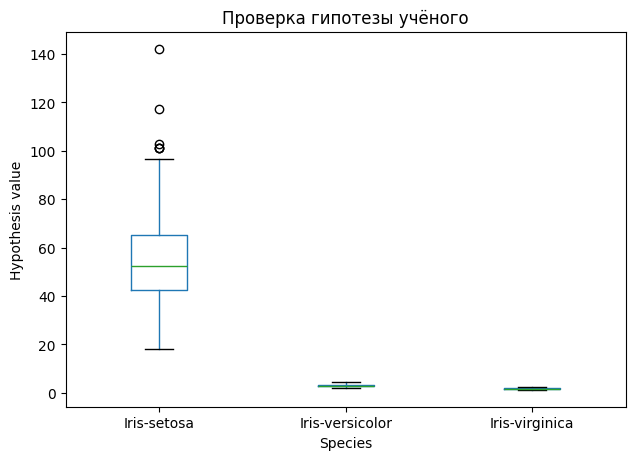

In [ ]:
import matplotlib.pyplot as plt

df["Hypothesis"] = (df["SepalLengthCm"] * df["SepalWidthCm"]) / (df["PetalLengthCm"] * df["PetalWidthCm"])

df.boxplot(column="Hypothesis", by="Species", grid=False, figsize=(7,5))
plt.title("Проверка гипотезы учёного")
plt.suptitle("")
plt.ylabel("Hypothesis value")
plt.show()
